# Demo for loading the MPI-MNIST data module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.datamodules import MPIMNISTDataModule

In [2]:
datapath = "/custom_datapath"
data_module = MPIMNISTDataModule(batch_size = 64,
                                 num_workers = 8,
                                 datapath = datapath,
                                 noise_dev = False, 
                                 model_dev = None,
                                 freq_selection = [0, 817],
                                 flattened = True,
                                 dim_phantom = 1)

Train set...
Physical models of generative and reconstruction system matrices are identical.
Loaded SM for data generation.
Loaded Noise.
Loaded SM for data reconstruction.
Test set...
Physical models of generative and reconstruction system matrices are identical.
Loaded SM for data generation.
Loaded Noise.
Loaded SM for data reconstruction.


In [3]:
test_dataloader = data_module.test_dataloader()
x, obs, obs_noisy = next(iter(test_dataloader))
print('GT shape: ', x.shape)
print('Observation shape: ', obs.shape)
print('Noisy obervation shape: ', obs_noisy.shape)


GT shape:  torch.Size([64, 255])
Observation shape:  torch.Size([64, 2451])
Noisy obervation shape:  torch.Size([64, 2451])


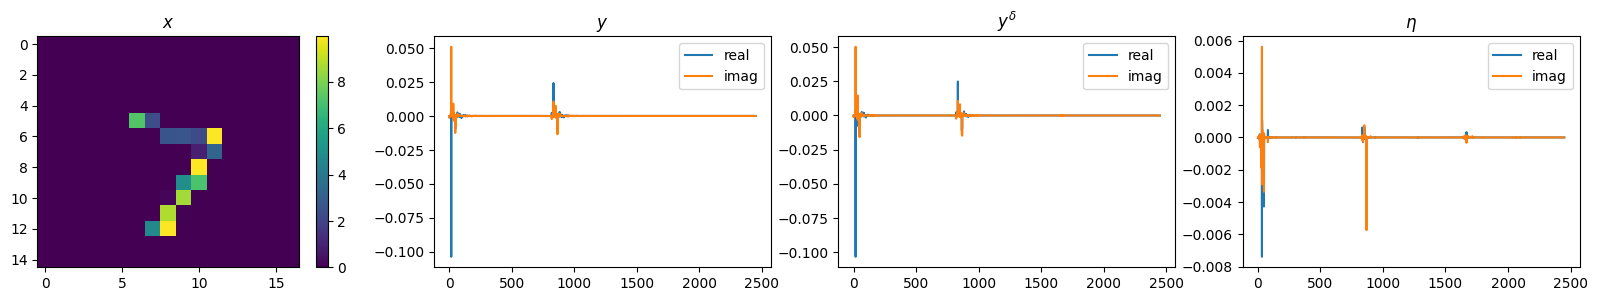

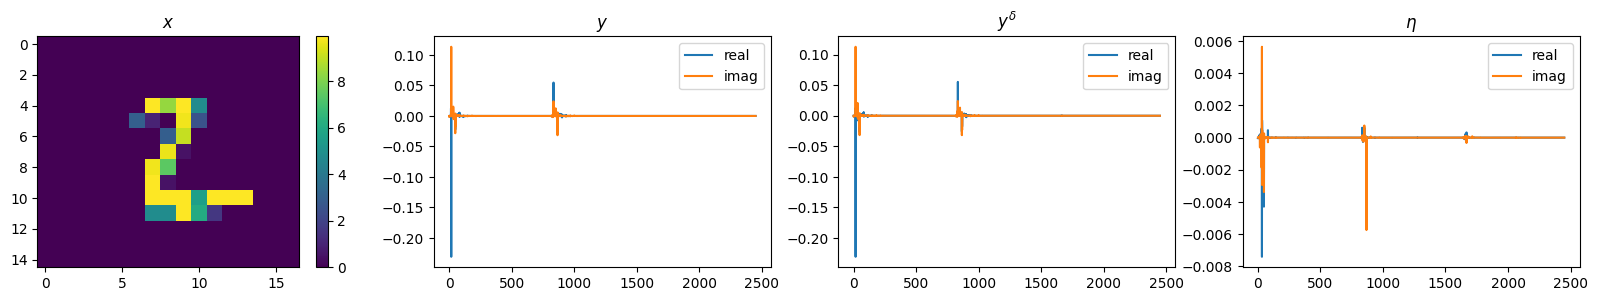

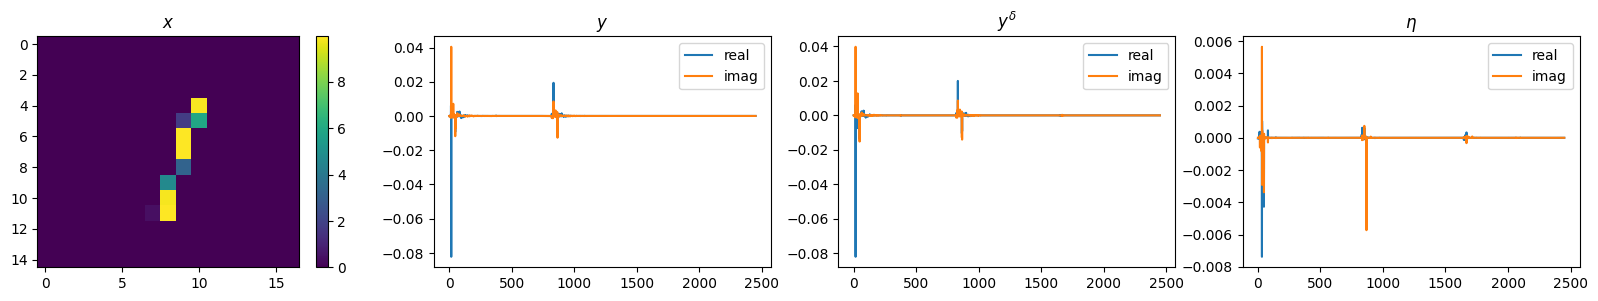

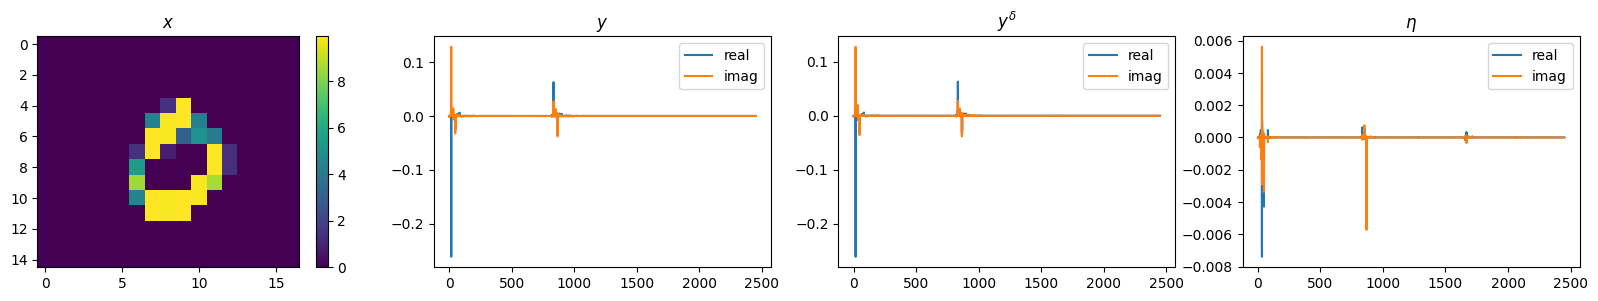

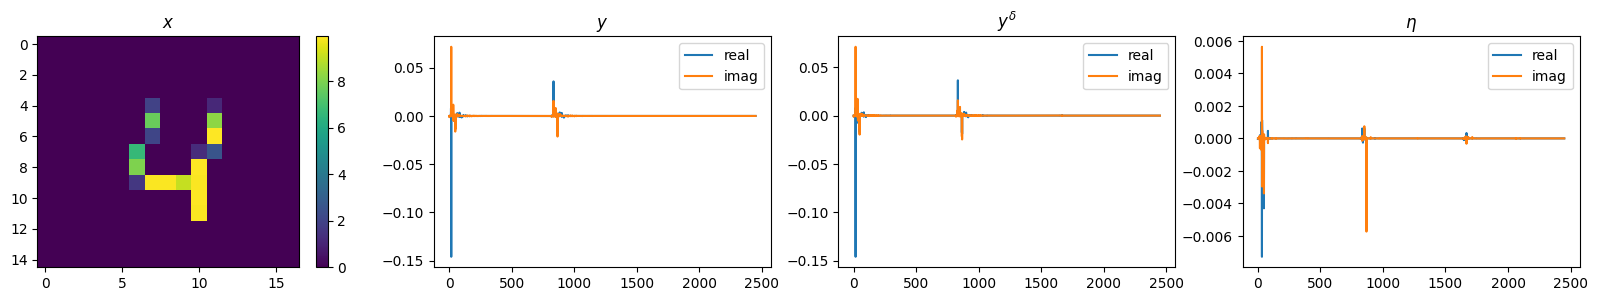

In [4]:
num_samples = 5
for i in range(num_samples):
    fig = plt.subplots(1, 4, figsize=(20,3))
    plt.subplot(1,4,1)
    plt.imshow(np.real(np.reshape(x[i].numpy(), (15, 17))))
    plt.colorbar()
    plt.title(r'$x$')
    plt.subplot(1,4,2)
    plt.plot(np.real(obs[i]), label = 'real')
    plt.plot(np.imag(obs[i]), label = 'imag')
    plt.legend()
    plt.title(r'$y$')
    plt.subplot(1,4,3)
    plt.plot(np.real(obs_noisy[i]), label = 'real')
    plt.plot(np.imag(obs_noisy[i]), label = 'imag')
    plt.legend()
    plt.title(r'$y^\delta$')
    plt.subplot(1,4,4)
    plt.plot(np.real(obs_noisy[i]-obs[i]), label = 'real')
    plt.plot(np.imag(obs_noisy[i]-obs[i]), label = 'imag')
    plt.legend()
    plt.title(r'$\eta$')